<a href="https://colab.research.google.com/github/athan37/Facial-attribute-classification/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collect and preprocess the dataset, including image resizing and normalization. Split the dataset into training, validation, and test sets.
Select an existing CNN architecture and complete, adjust it to people detection. 
Train the CNN on the training set using an appropriate loss function and optimizer.
Tune hyperparameters such as learning rate, number of layers, and number of filters to improve performance on the validation set.
Evaluate the performance of the CNN on the test set using metrics such as accuracy, precision, recall, and F1 score.
Implement people counting with traditional programming or deep learning.
Visualize the CNN's output to demonstrate its ability to accurately detect and count people in images.
Implement the solution to videos. (optional)

To provide the data, first download the file to your google drive in the correct file, then link the code to your drive account.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/My\ Drive/celeba_img.zip 

Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

In [3]:
import os


In [4]:
len(os.listdir("img_align_celeba"))

202599

In [5]:
os.listdir("img_align_celeba")[0]

'010634.jpg'

In [6]:
def parse(line):
  i = 0

  filename_last_idx = line.index("g") + 1
  filename = line[:filename_last_idx]

  i = filename_last_idx
  label = []

  while i < len(line):
    if line[i] == "-":
      label.append(0)
      i += 1
    elif line[i] == "1":
      label.append(1)
    i += 1

  return filename, label



In [7]:
import numpy as np
f = open("/content/gdrive/MyDrive/list_attr_celeba.txt", "r")
lines = f.readlines()
lines = lines[2:5002]
labels = [parse(line) for line in lines]
# Y = [parse(line)[1] for line in lines]
# run with only first 2 traits
Y = [parse(line)[1][:2] for line in lines]

Y = np.array(Y)

In [8]:
f = open("/content/gdrive/MyDrive/list_attr_celeba.txt", "r")

In [9]:
import cv2
import numpy as np
import os

directory = "img_align_celeba"
data = sorted(os.listdir("img_align_celeba"))
truncatedData = data[:5000]
X = np.array([cv2.imread(os.path.join(directory, filename)) for filename in truncatedData],dtype=np.float32)

In [10]:
os.listdir("img_align_celeba")[1]

'180432.jpg'

In [11]:
X.shape

(5000, 218, 178, 3)

In [12]:
# normalization
X = X / 255

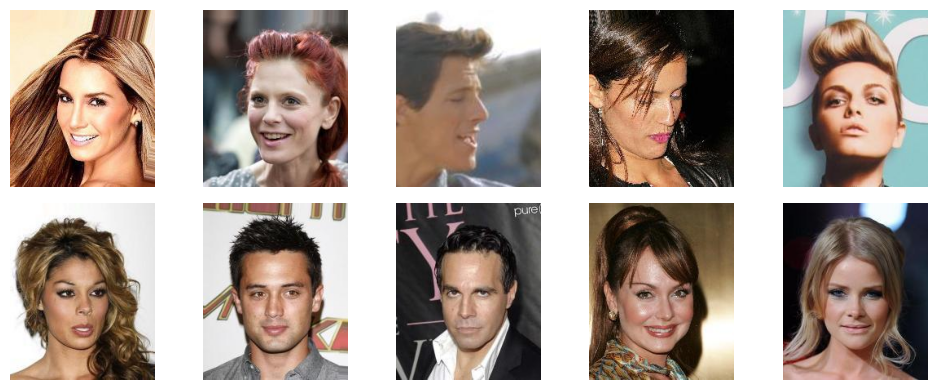

In [13]:
# Generated by chat GPT : print first 10 images from numpy list by 2 rows
import numpy as np
import matplotlib.pyplot as plt

# assume that 'images' is a numpy array of images
num_images = 10

# create a 2x5 grid of plots
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

# iterate over the first 10 images and display them in the grid
for i, axi in enumerate(ax.flat):
    if i < num_images:
        axi.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    axi.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# flatten images into 1D?
# flattened_dim = 218*178*3
# X = X.reshape(-1, flattened_dim)
X = X.astype("float32")

In [15]:
# separate into train, valid, test
v_point = int(0.7 * len(X))
t_point = int(0.9 * len(X))

X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

In [16]:
X.shape

(5000, 218, 178, 3)

1 Trait: Attractive

Epoch 1/10000
28/28 [==============================] - 14s 250ms/step - loss: 0.7281 - accuracy: 0.5751 - val_loss: 0.6175 - val_accuracy: 0.6550
Epoch 2/10000
28/28 [==============================] - 5s 170ms/step - loss: 0.6189 - accuracy: 0.6697 - val_loss: 0.5723 - val_accuracy: 0.7020
Epoch 3/10000
28/28 [==============================] - 4s 155ms/step - loss: 0.5675 - accuracy: 0.7117 - val_loss: 0.5471 - val_accuracy: 0.7070
Epoch 4/10000
28/28 [==============================] - 4s 155ms/step - loss: 0.5256 - accuracy: 0.7380 - val_loss: 0.4976 - val_accuracy: 0.7480
Epoch 5/10000
28/28 [==============================] - 5s 169ms/step - loss: 0.4929 - accuracy: 0.7626 - val_loss: 0.5010 - val_accuracy: 0.7420
Epoch 6/10000
28/28 [==============================] - 4s 156ms/step - loss: 0.4802 - accuracy: 0.7729 - val_loss: 0.5015 - val_accuracy: 0.7470
Epoch 7/10000
28/28 [==============================] - 4s 148ms/step - loss: 0.4520 - accuracy: 0.7857 - val_loss: 0.4946 - val_a

<Axes: >

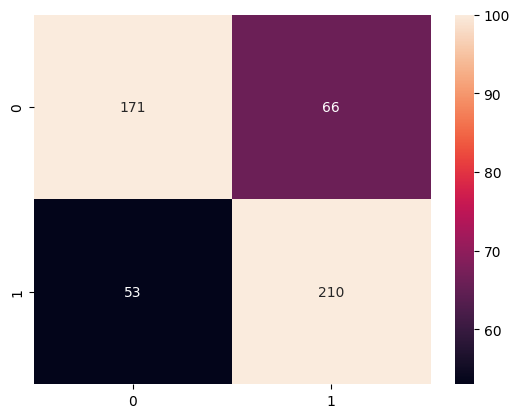

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Y_1 = [parse(line)[1][2] for line in lines]
Y_1 = np.array(Y_1)
Y_1_train = Y_1[:v_point]
Y_1_valid = Y_1[v_point:t_point]
Y_1_test  = Y_1[t_point:]

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1:])))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

network_history = model1.fit(X_train, Y_1_train, 
                            validation_data=(X_valid,Y_1_valid),
                            batch_size=128,                             
                            epochs=10000, 
                            verbose=1, 
                            callbacks=[es])

preds_1 = model1.predict(X_test)
rounded_preds_1 = np.round(preds_1)
eval_1 = model1.evaluate(X_test,Y_1_test)
print("Test loss:",eval_1[0])
print("Test accuracy:",eval_1[1])
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(Y_1_test[:,], rounded_preds_1[:,])

sns.heatmap(conf, annot=True, fmt='d', vmax=100)

Try training on a simple CNN model for 2 traits output

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
    
# Add a 2D convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1:])))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# Add another 2D convolutional layer with 64 filters and a 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 128 filters and a 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model.add(Flatten())

# Add a dense layer with 128 units and a dropout layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add the final dense output layer with the number of categories
model.add(Dense(len(Y_test[0]), activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)
network_history = model.fit(X_train, Y_train, 
                            validation_data=(X_valid,Y_valid),
                            batch_size=128,                             
                            epochs=10000, 
                            verbose=1, 
                            callbacks=[es])

Epoch 1/10000
28/28 [==============================] - 18s 263ms/step - loss: 0.5421 - accuracy: 0.3469 - val_loss: 0.4615 - val_accuracy: 0.2760
Epoch 2/10000
28/28 [==============================] - 4s 151ms/step - loss: 0.4626 - accuracy: 0.3271 - val_loss: 0.4227 - val_accuracy: 0.4220
Epoch 3/10000
28/28 [==============================] - 4s 143ms/step - loss: 0.4326 - accuracy: 0.4783 - val_loss: 0.4162 - val_accuracy: 0.4770
Epoch 4/10000
28/28 [==============================] - 4s 159ms/step - loss: 0.4077 - accuracy: 0.5217 - val_loss: 0.3864 - val_accuracy: 0.5090
Epoch 5/10000
28/28 [==============================] - 4s 156ms/step - loss: 0.3841 - accuracy: 0.5563 - val_loss: 0.3820 - val_accuracy: 0.4720
Epoch 6/10000
28/28 [==============================] - 4s 144ms/step - loss: 0.3580 - accuracy: 0.5823 - val_loss: 0.3686 - val_accuracy: 0.5500
Epoch 7/10000
28/28 [==============================] - 4s 151ms/step - loss: 0.3482 - accuracy: 0.5951 - val_loss: 0.3612 - val_a

In [35]:
preds = model.predict(X_test)

16/16 [==============================] - 0s 17ms/step


Displaying results for two traits: baldness and eyeglasses

16/16 [==============================] - 0s 18ms/step - loss: 0.4729 - accuracy: 0.5560
Test loss: 0.4728894829750061
Test accuracy: 0.5559999942779541


<Axes: >

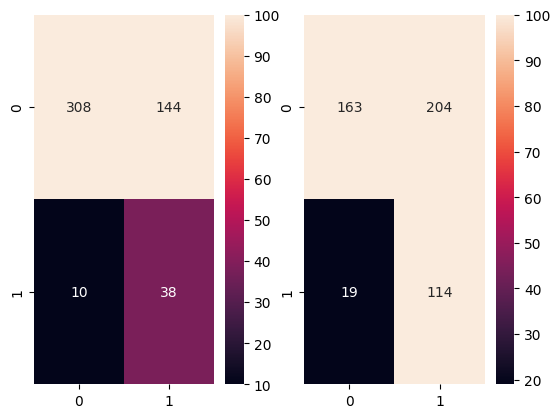

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

eval = model.evaluate(X_test,Y_test)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

rounded_preds = np.round(preds)
# conf=multilabel_confusion_matrix(Y_test,rounded_preds)
conf1=confusion_matrix(Y_test[:,0], rounded_preds[:,0])
conf2=confusion_matrix(Y_test[:,1], rounded_preds[:,1])

fig, (ax1, ax2) = plt.subplots(ncols=2)

sns.heatmap(conf1, annot=True, fmt='d', vmax=100, ax=ax1)
sns.heatmap(conf2, annot=True, fmt='d', vmax=100, ax=ax2)

Trying on first 10 traits: 5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Y_10 = [parse(line)[1][:10] for line in lines]
Y_10 = np.array(Y_10)
Y_10_train = Y_10[:v_point]
Y_10_valid = Y_10[v_point:t_point]
Y_10_test  = Y_10[t_point:]

model10 = Sequential()
model10.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1:])))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(64, (3, 3), activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(128, (3, 3), activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Flatten())
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(len(Y_10_test[0]), activation='softmax'))

model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)

network_history = model10.fit(X_train, Y_10_train, 
                            validation_data=(X_valid,Y_10_valid),
                            batch_size=128,                             
                            epochs=10000, 
                            verbose=1, 
                            callbacks=[es])

Epoch 1/10000
28/28 [==============================] - 24s 313ms/step - loss: 0.5714 - accuracy: 0.1951 - val_loss: 0.4726 - val_accuracy: 0.2530
Epoch 2/10000
28/28 [==============================] - 4s 155ms/step - loss: 0.4825 - accuracy: 0.2303 - val_loss: 0.4360 - val_accuracy: 0.2010
Epoch 3/10000
28/28 [==============================] - 6s 202ms/step - loss: 0.4503 - accuracy: 0.2311 - val_loss: 0.3996 - val_accuracy: 0.2380
Epoch 4/10000
28/28 [==============================] - 4s 143ms/step - loss: 0.4197 - accuracy: 0.2354 - val_loss: 0.3797 - val_accuracy: 0.2330
Epoch 5/10000
28/28 [==============================] - 4s 145ms/step - loss: 0.3934 - accuracy: 0.2463 - val_loss: 0.3649 - val_accuracy: 0.2440
Epoch 6/10000
28/28 [==============================] - 4s 160ms/step - loss: 0.3741 - accuracy: 0.2603 - val_loss: 0.3627 - val_accuracy: 0.2250


In [20]:
preds_10 = model10.predict(X_test)
print(preds_10[0])

16/16 [==============================] - 1s 33ms/step
[0.05170874 0.1339669  0.25729597 0.08316325 0.0287933  0.06894958
 0.11178327 0.09942782 0.11670945 0.04820177]


In [21]:
rounded_preds_10 = np.round(preds_10)
eval_10 = model10.evaluate(X_test,Y_10_test)
print("Test loss:",eval_10[0])
print("Test accuracy:",eval_10[1])

16/16 [==============================] - 0s 15ms/step - loss: 0.4585 - accuracy: 0.3000
Test loss: 0.4584982395172119
Test accuracy: 0.30000001192092896


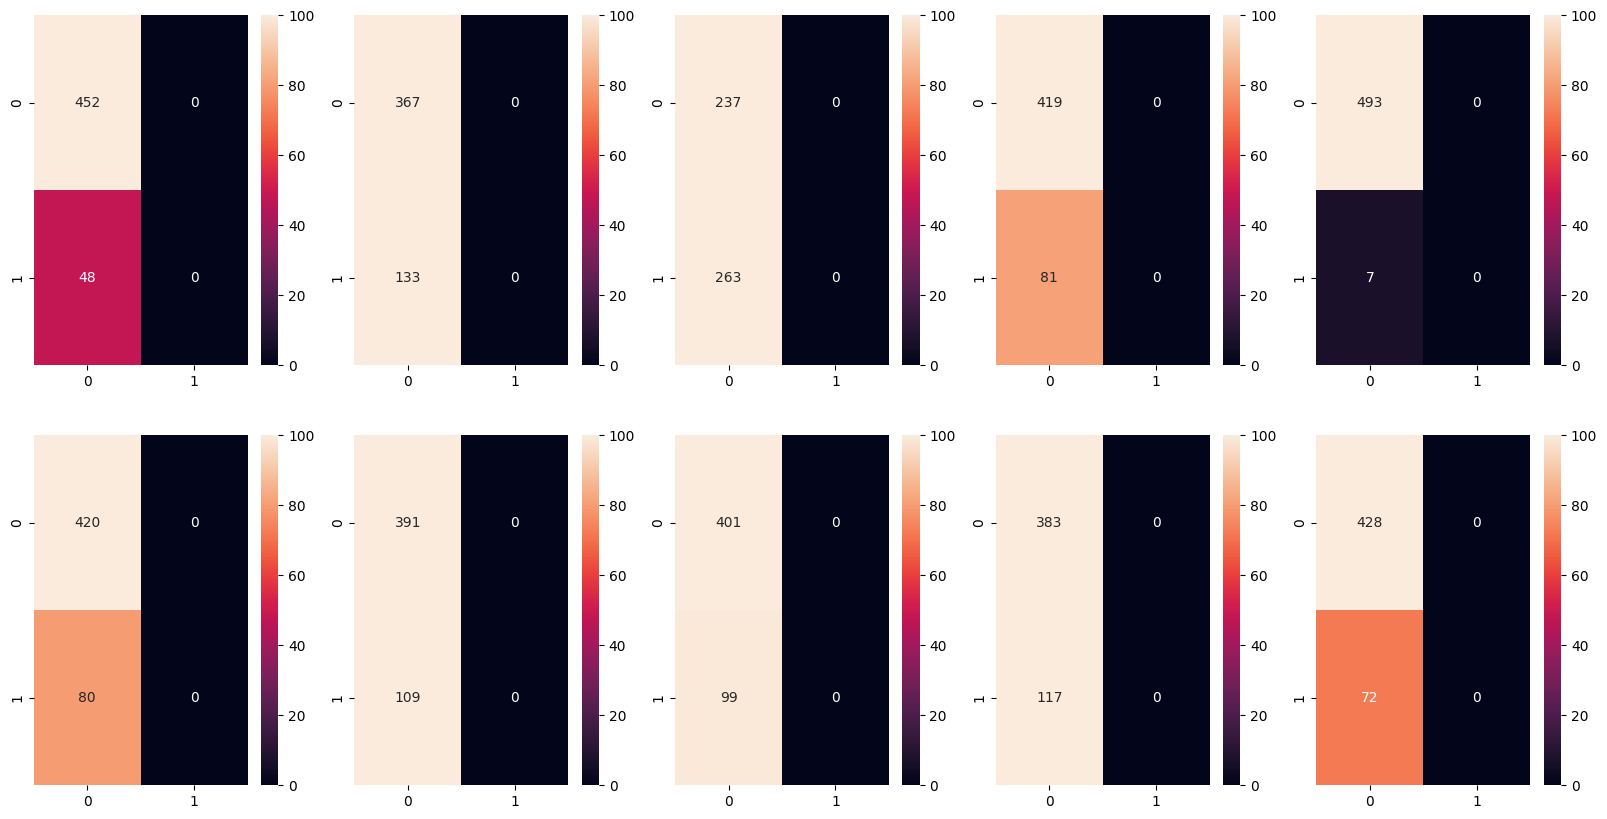

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

f, axes = plt.subplots(2,5,figsize=(20, 10))
axes = axes.ravel()
for i in range(10):
  conf=confusion_matrix(Y_10_test[:,i], rounded_preds_10[:,i])
  sns.heatmap(conf, annot=True, fmt='d', vmax=100, ax = axes[i])

Try efficient net to train on 1 traits




In [17]:
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 1
LEARNING_RATE = 1e-4

# Load pre-trained EfficientNetB0 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(X.shape[1:]))

# Add custom layers for multi-label classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Dense(NUM_CLASSES * 2, activation='sigmoid')(x)
output = Dense(NUM_CLASSES, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=LEARNING_RATE),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

network_history = model.fit(X_train, Y_1_train, 
                            validation_data=(X_valid,Y_1_valid),
                            batch_size=128,                             
                            epochs=10000, 
                            verbose=1, 
                            callbacks=[es])

eval = model.evaluate(X_test,Y_1_test)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

# # Unfreeze the base model layers for further fine-tuning (optional)
# for layer in base_model.layers:
#     layer.trainable = True

# # Re-compile the model (optional)
# model.compile(optimizer=Adam(lr=LEARNING_RATE / 10),
#               loss=BinaryCrossentropy(),
#               metrics=['accuracy'])

# # Train the model for more epochs (optional)
# history = model.fit(train_generator,
#                     epochs=EPOCHS,
#                     validation_data=validation_generator)

9406464/9406464 [==============================] - 1s 0us/step


Epoch 1/10000
28/28 [==============================] - 13s 335ms/step - loss: 0.5884 - accuracy: 0.6797 - val_loss: 0.5299 - val_accuracy: 0.7240
Epoch 2/10000
28/28 [==============================] - 5s 177ms/step - loss: 0.5040 - accuracy: 0.7534 - val_loss: 0.4964 - val_accuracy: 0.7530
Epoch 3/10000
28/28 [==============================] - 5s 180ms/step - loss: 0.4809 - accuracy: 0.7660 - val_loss: 0.4853 - val_accuracy: 0.7610
Epoch 4/10000
28/28 [==============================] - 5s 181ms/step - loss: 0.4644 - accuracy: 0.7777 - val_loss: 0.4799 - val_accuracy: 0.7610
Epoch 5/10000
28/28 [==============================] - 5s 177ms/step - loss: 0.4562 - accuracy: 0.7837 - val_loss: 0.4776 - val_accuracy: 0.7660
Epoch 6/10000
28/28 [==============================] - 5s 182ms/step - loss: 0.4482 - accuracy: 0.7897 - val_loss: 0.4742 - val_accuracy: 0.7640
Epoch 7/10000
28/28 [==============================] - 5s 179ms/step - loss: 0.4415 - accuracy: 0.8009 - val_loss: 0.4807 - val_a

16/16 [==============================] - 1s 42ms/step


<Axes: >

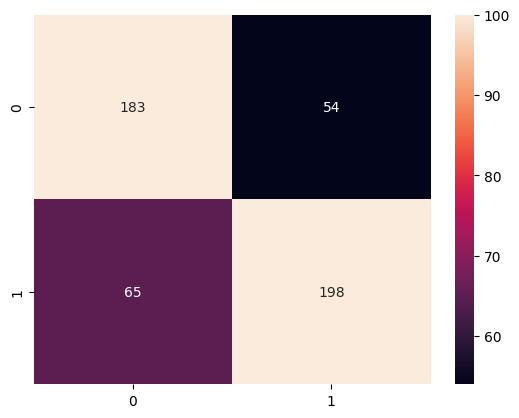

In [24]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

preds = model.predict(X_test)
conf=confusion_matrix(Y_1_test,np.round(preds))
sns.heatmap(conf, annot=True, fmt='d', vmax=100)